<a href="https://colab.research.google.com/github/angelikipilioura/Computational-Data-Journalism/blob/main/Homework5_Angeliki_Pilioura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Θα αναλύσουμε δεδομένα για τρομερά ατυχήματα που έχουν συμβεί σε εργαζόμενους. 
Το dataset είναι από εδώ: https://www.osha.gov/severeinjury/index.html

Σήμερα θα κάνετε μόνοι σας ανάλυση στα δεδομένα με βάση όσα έχετε μάθει μέχρι στιγμής! Για να μάθετε περισσότερα για τους κωδικούς των ατυχημάτων πρέπει να διαβάσετε το αντίστοιχο documentation ( https://www.bls.gov/iif/oshoiics.htm), αυτό είναι η πρακτική στις περισσότερες περιπτώσεις που παίρνουμε έτοιμα δεδομένα από κάποια υπηρεσία. 

In [1]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_id = '1R-7GoTzsLd-JuDaQ5VH024Ah9HkZp5_n'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
accidents = pd.read_csv(url, encoding="latin-1")

In [3]:
accidents.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


## Πετάμε τις στήλες που δεν χρειαζόμαστε

In [4]:
accidents.drop(["ID","UPA","Address1","Address2","Primary NAICS","Inspection",
         "Nature","Part of Body","Event","Source","Secondary Source"],axis=1,inplace=True)

## Και από εδώ και πέρα ξεκινούν οι δικές σας 10 ερωτήσεις στα δεδομένα! Φτιάξτε γραφήματα και βρείτε π.χ. σε ποιες βιομηχανίες συμβαίνουν τα περισσότερα ατυχήματα κλπ. Καλή επιτυχία!

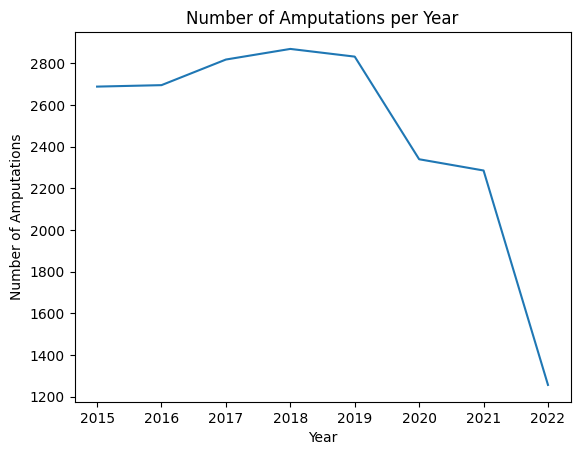

In [18]:
yearly_amputations = accidents[accidents['Amputation'] == 1]['Year'].value_counts().sort_index()

yearly_amputations.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Amputations')
plt.title('Number of Amputations per Year')
plt.show()

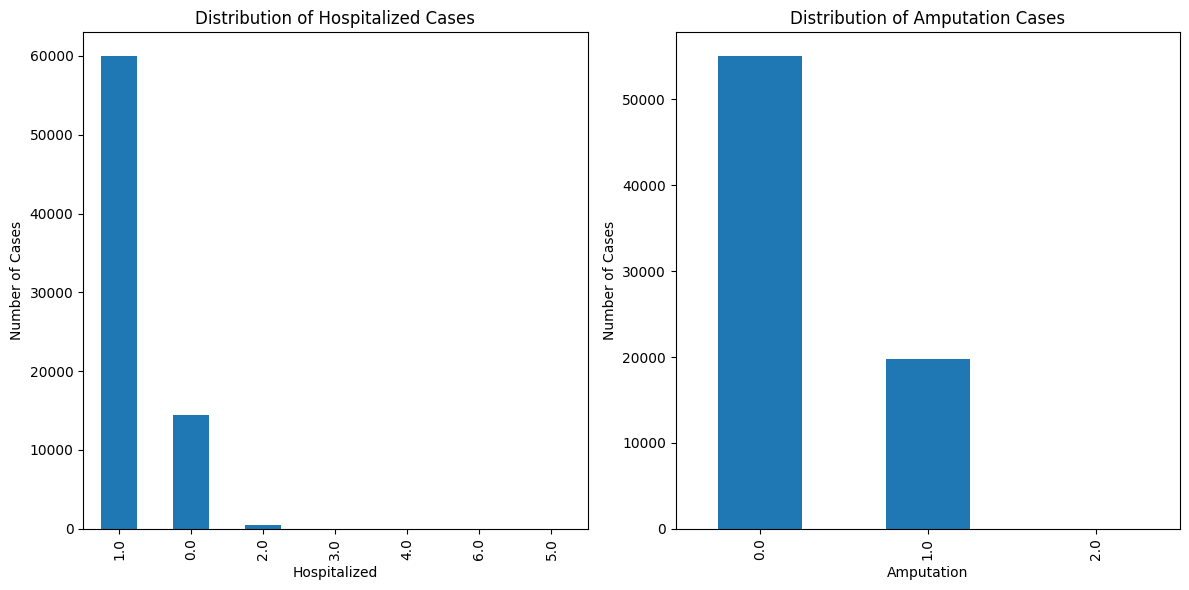

In [15]:
hospitalized_counts = accidents['Hospitalized'].value_counts()
amputation_counts = accidents['Amputation'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

hospitalized_counts.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Hospitalized')
axs[0].set_ylabel('Number of Cases')
axs[0].set_title('Distribution of Hospitalized Cases')

amputation_counts.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Amputation')
axs[1].set_ylabel('Number of Cases')
axs[1].set_title('Distribution of Amputation Cases')

plt.tight_layout()
plt.show()

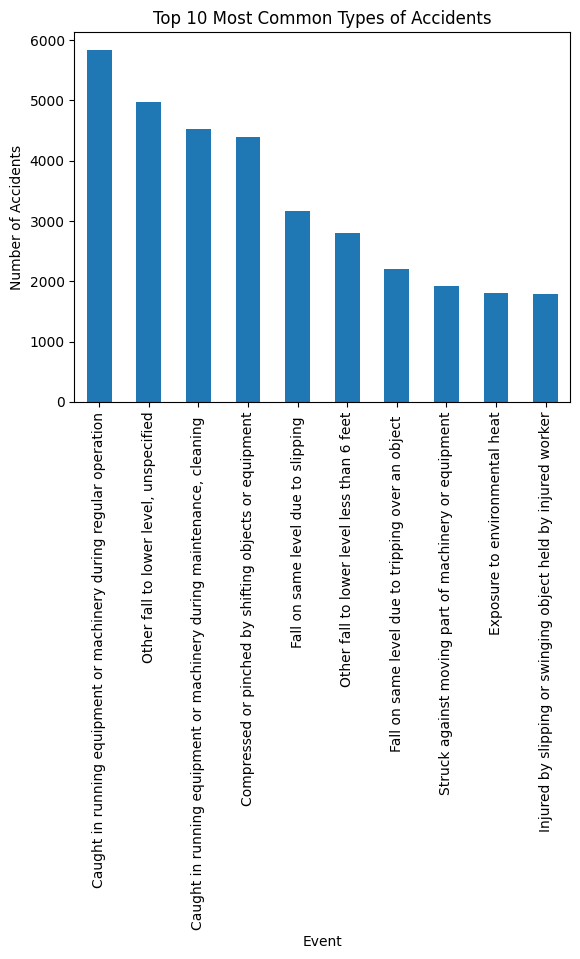

In [14]:
event_counts = accidents['EventTitle'].value_counts()

event_counts[:10].plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Most Common Types of Accidents')
plt.show()

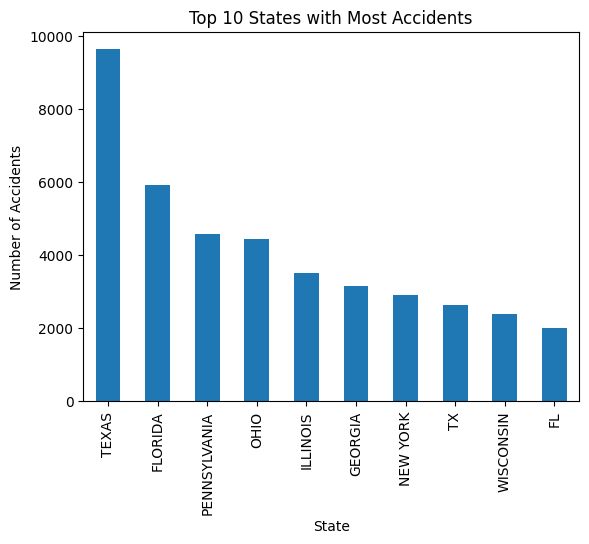

In [16]:
state_accident_counts = accidents['State'].value_counts()

state_accident_counts[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Top 10 States with Most Accidents')
plt.show()

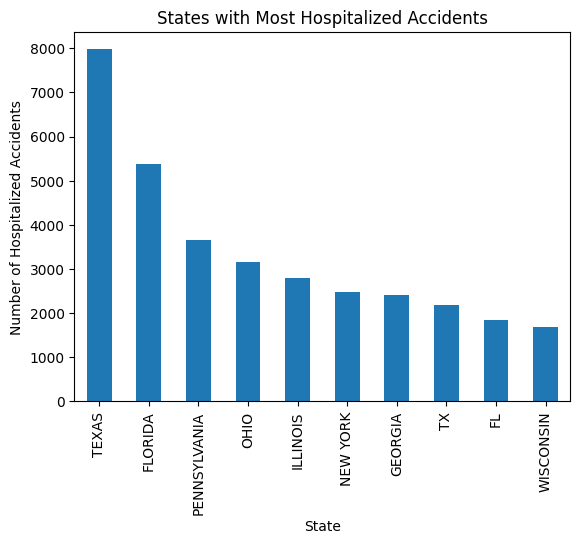

In [13]:
hospitalized_by_state = accidents.groupby('State')['Hospitalized'].sum()

hospitalized_by_state.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Hospitalized Accidents')
plt.title('States with Most Hospitalized Accidents')
plt.show()

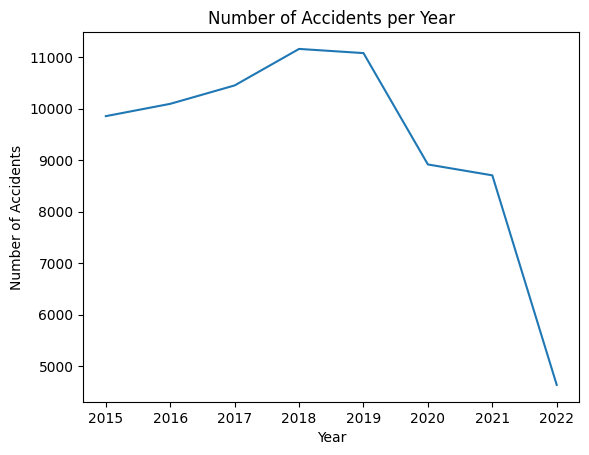

In [7]:
accidents['Year'] = pd.to_datetime(accidents['EventDate']).dt.year

yearly_accidents = accidents['Year'].value_counts().sort_index()

yearly_accidents.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()


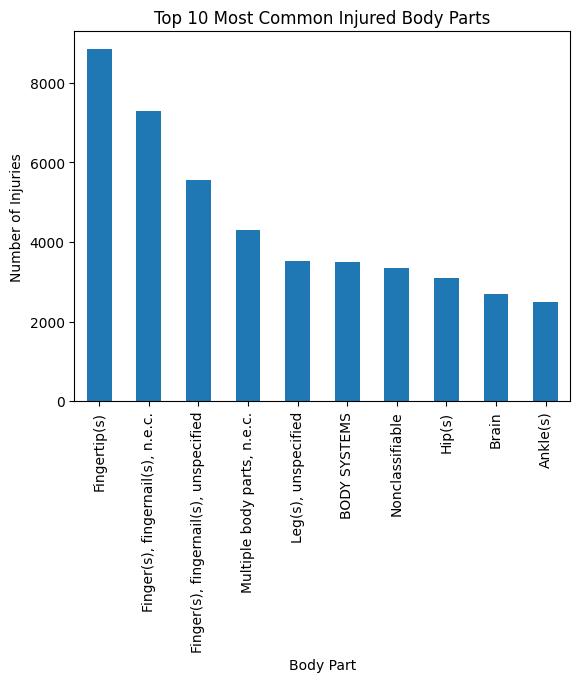

In [8]:
bodypart_counts = accidents['Part of Body Title'].value_counts()

bodypart_counts[:10].plot(kind='bar')
plt.xlabel('Body Part')
plt.ylabel('Number of Injuries')
plt.title('Top 10 Most Common Injured Body Parts')
plt.show()


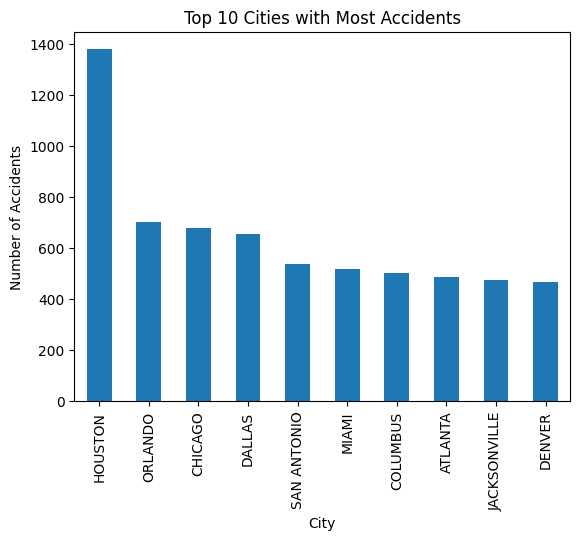

In [12]:
city_accident_counts = accidents['City'].value_counts()

city_accident_counts[:10].plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Cities with Most Accidents')
plt.show()

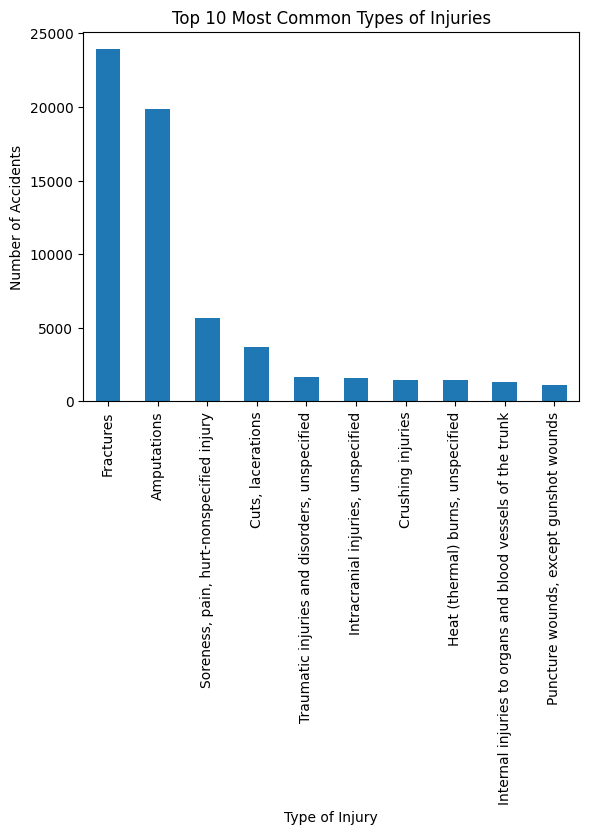

In [11]:
injury_counts = accidents['NatureTitle'].value_counts()

injury_counts[:10].plot(kind='bar')
plt.xlabel('Type of Injury')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Most Common Types of Injuries')
plt.show()

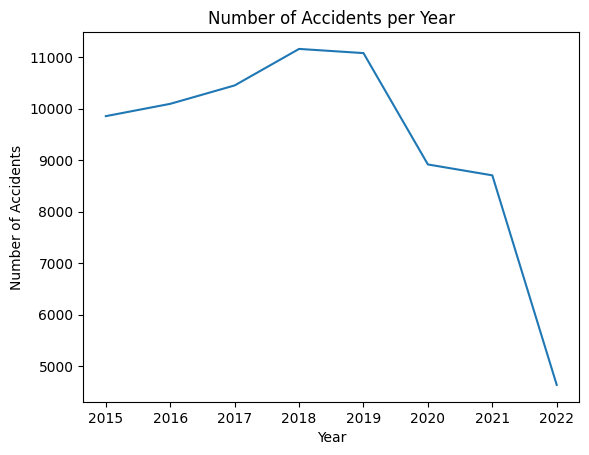

In [10]:
accidents['Year'] = pd.to_datetime(accidents['EventDate']).dt.year

yearly_accidents = accidents['Year'].value_counts().sort_index()

yearly_accidents.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()

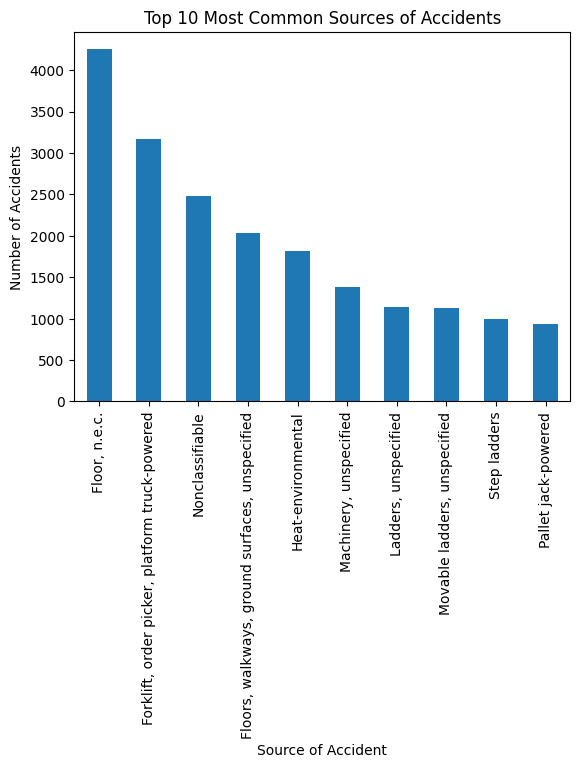

In [9]:
source_counts = accidents['SourceTitle'].value_counts()

source_counts[:10].plot(kind='bar')
plt.xlabel('Source of Accident')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Most Common Sources of Accidents')
plt.show()